# **Final Project: Resolving Educational Institution Problems**

* Name: Dany Eka Saputra
* Email: [ekadany12@gmail.com](mailto:ekadany12@gmail.com)
* Dicoding ID: [danyeka_s](https://dicoding.com/users/danyeka_s)

## Business Understanding

Jaya Jaya Institut (nama fiktif) merupakan salah satu institusi pendidikan perguruan yang telah berdiri sejak tahun 2000. Hingga saat ini ia telah mencetak banyak lulusan dengan reputasi yang sangat baik.

### Permasalahan bisnis

Akan tetapi, terdapat banyak juga siswa yang tidak menyelesaikan pendidikannya alias dropout. Jumlah dropout yang tinggi ini tentunya menjadi salah satu masalah yang besar untuk sebuah institusi pendidikan. Masalah dropout di Jaya Jaya Institut merupakan tantangan yang signifikan yang perlu segera ditangani. Dropout tidak hanya mempengaruhi reputasi institusi tetapi juga berdampak negatif pada perkembangan pribadi dan akademik siswa yang terlibat. Penanganan yang tepat terhadap masalah ini dapat meminimalkan angka dropout dan meningkatkan kesuksesan akademik serta kepuasan siswa.

Salah satu langkah penting dalam mengatasi masalah dropout adalah dengan mengidentifikasi faktor-faktor yang mungkin menyebabkan siswa mengambil keputusan untuk keluar dari institusi. Beberapa faktor umum yang sering menjadi penyebab dropout meliputi masalah keuangan, tekanan akademik yang berlebihan, ketidakcocokan dengan lingkungan belajar, masalah pribadi atau keluarga, serta kurangnya dukungan sosial dan akademik.

Jaya Jaya Institut perlu mengembangkan sistem monitoring yang efektif untuk mendeteksi tanda-tanda awal siswa yang berisiko dropout. Hal ini dapat dilakukan dengan memanfaatkan data historis dan informasi akademik, perilaku belajar, dan interaksi siswa dengan dosen dan rekan-rekan sekelas. Analisis data yang cermat dapat membantu dalam mengidentifikasi pola-pola yang mengarah pada keputusan dropout.

Dengan pendekatan yang holistik dan berkelanjutan terhadap masalah dropout, Jaya Jaya Institut dapat membangun lingkungan pendidikan yang inklusif, mendukung semua siswa dalam mencapai potensi mereka, dan memastikan bahwa setiap siswa memiliki kesempatan yang adil untuk sukses dalam pendidikan mereka. Oleh karena itu, Jaya Jaya Institut ingin mendeteksi secepat mungkin siswa yang mungkin akan melakukan dropout sehingga dapat diberi bimbingan khusus.

### Cakupan proyek

- Mengidentifikasi faktor-faktor yang mempengaruhi siswa untuk melakukan dropout.
- Membuat aksi rekomendasi berdasarkan analisis data.
- Membuat dashboard untuk memudahkan stackholder dalam memahami data dan memantau performa siswa.
- Membuat solusi machine learning yang siap digunakan.

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import missingno

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.decomposition import PCA
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, recall_score, classification_report

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = None

In [ ]:
import altair
altair.__version__

'5.5.0'

### Menyiapkan data yang akan diguankan

In [ ]:
df = pd.read_csv('data.csv', sep=';')
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Data Understanding

In [ ]:
def skim_data(df):
    df_skim = pd.DataFrame({'feature': df.columns,
                            'data_type': df.dtypes.reset_index()[0],
                            'n_unique': [df[x].nunique() for x in df.columns],
                            'unique': [df[x].unique() for x in df.columns]})
    return df_skim

skim_data(df)

,feature,data_type,n_unique,unique
0,Marital_status,int64,6,"[1, 2, 4, 3, 5, 6]"
1,Application_mode,int64,18,"[17, 15, 1, 39, 18, 53, 44, 51, 43, 7, 42, 16, 5, 2, 10, 57, 26, 27]"
2,Application_order,int64,8,"[5, 1, 2, 4, 3, 6, 9, 0]"
3,Course,int64,17,"[171, 9254, 9070, 9773, 8014, 9991, 9500, 9238, 9670, 9853, 9085, 9130, 9556, 9147, 9003, 33, 9119]"
4,Daytime_evening_attendance,int64,2,"[1, 0]"
5,Previous_qualification,int64,17,"[1, 19, 42, 39, 10, 3, 40, 2, 4, 12, 43, 15, 6, 9, 38, 5, 14]"
6,Previous_qualification_grade,float64,101,"[122.0, 160.0, 100.0, 133.1, 142.0, 119.0, 137.0, 138.0, 139.0, 136.0, 133.0, 110.0, 149.0, 127.0, 135.0, 140.0, 125.0, 126.0, 151.0, 115.0, 150.0, 143.0, 130.0, 120.0, 103.0, 154.0, 132.0, 167.0, 129.0, 141.0, 116.0, 148.0, 118.0, 106.0, 121.0, 114.0, 124.0, 123.0, 113.0, 111.0, 131.0, 158.0, 146.0, 117.0, 153.0, 178.0, 99.0, 134.0, 128.0, 170.0, 155.0, 145.0, 152.0, 112.0, 107.0, 156.0, 188.0, 96.0, 161.0, 166.0, 147.0, 144.0, 102.0, 101.0, 180.0, 172.0, 105.0, 108.0, 165.0, 190.0, 162.0, 164.0, 163.0, 159.0, 117.4, 175.0, 133.8, 176.0, 168.0, 139.3, 97.0, 157.0, 140.8, 184.4, 148.9, 109.0, 174.0, 182.0, 138.6, 95.0, 154.4, 163.3, 145.7, 123.9, 124.4, 169.0, 177.0, 138.7, 119.1, 118.9, ...]"
7,Nacionality,int64,21,"[1, 62, 6, 41, 26, 103, 13, 25, 21, 101, 11, 22, 32, 100, 24, 109, 2, 108, 105, 14, 17]"
8,Mothers_qualification,int64,29,"[19, 1, 37, 38, 3, 4, 42, 2, 34, 12, 40, 9, 5, 39, 11, 41, 30, 14, 35, 36, 6, 10, 29, 43, 18, 22, 27, 26, 44]"
9,Fathers_qualification,int64,34,"[12, 3, 37, 38, 1, 19, 5, 4, 34, 2, 39, 11, 9, 36, 26, 40, 14, 20, 35, 41, 22, 13, 29, 43, 18, 42, 10, 6, 30, 25, 44, 33, 27, 31]"


In [ ]:
# int to qualitative

# Binary (8 columns)
binary_columns = ['Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Scholarship_holder',
                  'International', 'Daytime_evening_attendance', 'Gender']

# High cardinality (9 columns)
high_cardinality_columns = ['Application_mode', 'Course', 'Previous_qualification', 'Nacionality', 'Mothers_qualification',
                            'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Marital_status']

In [ ]:
# Target variable distribution

df['Status'].value_counts()/len(df)

,count
Status,
Graduate,0.499322
Dropout,0.321203
Enrolled,0.179476


## Data Preparation

### Target variable

In here, I will drop student with enrolled status. It will make the model works better because it will be a binary classification. Moreover, intuitively I think I don't have to include student with enrolled status. As our focus in here is to analyze student who got dropped out.

Then, I will change Graduate value into Not Dropout.

*Alternatifely you can change the value of enrolled & graduate into **Not Dropout** also..*

In [ ]:
df = df[df['Status'] != 'Enrolled']
df['Status'] = df['Status'].replace("Graduate", "Not Dropout")

In [ ]:
# target variable proportion
df['Status'].value_counts()/len(df)

,count
Status,
Not Dropout,0.60854
Dropout,0.39146


### Dulication & missing values

In [ ]:
print(f'Duplicated data: {df.duplicated().sum()}')

Duplicated data: 0


In [ ]:
# Missing values
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


<Axes: >

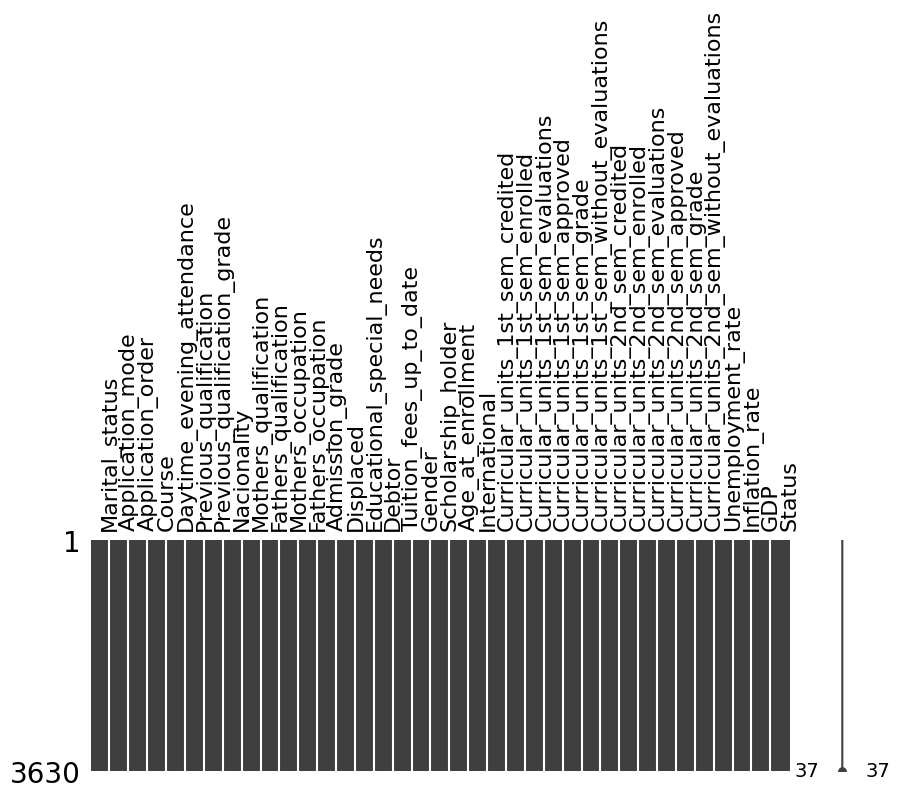

In [ ]:
missingno.matrix(df, figsize=(10,3), label_rotation=90)

### Decoding

In [ ]:
# categorical - binary  - yes/no
yes_no_columns = ['Displaced', 'Educational_special_needs', 'Debtor',
                  'Tuition_fees_up_to_date', 'Scholarship_holder', 'International']
for column in yes_no_columns:
    df[column] = df[column].map(lambda x: 'yes' if x==1 else 'no')

# categorical
Marital_status_dict = {1:'single', 2:'married', 3:'widower',
                       4:'divorced', 5:'facto union', 6:'legally separated'}
Daytime_evening_attendance_dict = {1:'daytime', 0:'evening'}
Gender_dict = {1:'male', 0:'female'}
Application_mode_dict = {1 : '1st phase - general contingent', 2 : 'Ordinance No. 612/93', 5 : '1st phase - special contingent (Azores Island)',
                         7 : 'Holders of other higher courses', 10 : 'Ordinance No. 854-B/99', 15 : 'International student (bachelor)', 16 : '1st phase - special contingent (Madeira Island)',
                         17 : '2nd phase - general contingent', 18 : '3rd phase - general contingent', 26 : 'Ordinance No. 533-A/99, item b2) (Different Plan)',
                         27 : 'Ordinance No. 533-A/99, item b3 (Other Institution)', 39 : 'Over 23 years old', 42 : 'Transfer',
                         43 : 'Change of course', 44 : 'Technological specialization diploma holders', 51 : 'Change of institution/course',
                         53 : 'Short cycle diploma holders', 57 : 'Change of institution/course (International)'}
Course_dict = {33 : 'Biofuel Production Technologies', 171 : 'Animation and Multimedia Design', 8014 : 'Social Service (evening attendance)',
               9003 : 'Agronomy', 9070 : 'Communication Design', 9085 : 'Veterinary Nursing',
               9119 : 'Informatics Engineering', 9130 : 'Equinculture', 9147 : 'Management',
               9238 : 'Social Service', 9254 : 'Tourism', 9500 : 'Nursing',
               9556 : 'Oral Hygiene', 9670 : 'Advertising and Marketing Management', 9773 : 'Journalism and Communication',
               9853 : 'Basic Education', 9991 : 'Management (evening attendance)'}
Previous_qualification_dict = {1 : 'Secondary education', 2 : "Higher education - bachelor's degree", 3 : 'Higher education - degree',
                               4 : "Higher education - master's", 5 : 'Higher education - doctorate', 6 : 'Frequency of higher education',
                               9 : '12th year of schooling - not completed', 10 : '11th year of schooling - not completed', 12 : 'Other - 11th year of schooling',
                               14 : '10th year of schooling', 15 : '10th year of schooling - not completed', 19 : 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
                               38 : 'Basic education 2nd cycle (6th/7th/8th year) or equiv.', 39 : 'Technological specialization course', 40 : 'Higher education - degree (1st cycle)',
                               42 : 'Professional higher technical course', 43 : 'Higher education - master (2nd cycle)'}
Nacionality_dict = {1 : 'Portuguese', 2 : 'German', 6 : 'Spanish', 11 : 'Italian', 13 : 'Dutch',
                    14 : 'English', 17 : 'Lithuanian', 21 : 'Angolan', 22 : 'Cape Verdean', 24 : 'Guinean',
                    25 : 'Mozambican', 26 : 'Santomean', 32 : 'Turkish', 41 : 'Brazilian', 62 : 'Romanian',
                    100 : 'Moldova (Republic of)', 101 : 'Mexican', 103 : 'Ukrainian', 105 : 'Russian', 108 : 'Cuban',
                    109 : 'Colombian'}
Mothers_qualification_dict = {1 : 'Secondary Education - 12th Year of Schooling or Eq.', 2 : "Higher Education - Bachelor's Degree", 3 : 'Higher Education - Degree',
                              4 : "Higher Education - Master's", 5 : 'Higher Education - Doctorate', 6 : 'Frequency of Higher Education',
                              9 : '12th Year of Schooling - Not Completed', 10 : '11th Year of Schooling - Not Completed', 11 : '7th Year (Old)',
                              12 : 'Other - 11th Year of Schooling', 14 : '10th Year of Schooling', 18 : 'General commerce course',
                              19 : 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.', 22 : 'Technical-professional course', 26 : '7th year of schooling',
                              27 : '2nd cycle of the general high school course', 29 : '9th Year of Schooling - Not Completed', 30 : '8th year of schooling',
                              34 : 'Unknown', 35 : "Can't read or write", 36 : 'Can read without having a 4th year of schooling', 37 : 'Basic education 1st cycle (4th/5th year) or equiv.',
                              38 : 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.', 39 : 'Technological specialization course', 40 : 'Higher education - degree (1st cycle)',
                              41 : 'Specialized higher studies course', 42 : 'Professional higher technical course', 43 : 'Higher Education - Master (2nd cycle)',
                              44 : 'Higher Education - Doctorate (3rd cycle)'}
Fathers_qualification_dict = {1 : 'Secondary Education - 12th Year of Schooling or Eq.', 2 : "Higher Education - Bachelor's Degree", 3 : 'Higher Education - Degree',
                              4 : "Higher Education - Master's", 5 : 'Higher Education - Doctorate', 6 : 'Frequency of Higher Education',
                              9 : '12th Year of Schooling - Not Completed', 10 : '11th Year of Schooling - Not Completed', 11 : '7th Year (Old)',
                              12 : 'Other - 11th Year of Schooling', 13 : '2nd year complementary high school course', 14 : '10th Year of Schooling',
                              18 : 'General commerce course', 19 : 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.', 20 : 'Complementary High School Course',
                              22 : 'Technical-professional course', 25 : 'Complementary High School Course - not concluded', 26 : '7th year of schooling',
                              27 : '2nd cycle of the general high school course', 29 : '9th Year of Schooling - Not Completed', 30 : '8th year of schooling',
                              31 : 'General Course of Administration and Commerce', 33 : 'Supplementary Accounting and Administration', 34 : 'Unknown',
                              35 : "Can't read or write", 36 : 'Can read without having a 4th year of schooling', 37 : 'Basic education 1st cycle (4th/5th year) or equiv.',
                              38 : 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.', 39 : 'Technological specialization course', 40 : 'Higher education - degree (1st cycle)',
                              41 : 'Specialized higher studies course', 42 : 'Professional higher technical course', 43 : 'Higher Education - Master (2nd cycle)',
                              44 : 'Higher Education - Doctorate (3rd cycle)'}
Mothers_occupation_dict = {0 : 'Student', 1 : 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers', 2 : 'Specialists in Intellectual and Scientific Activities',
                           3 : 'Intermediate Level Technicians and Professions', 4 : 'Administrative staff', 5 : 'Personal Services, Security and Safety Workers and Sellers',
                           6 : 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry', 7 : 'Skilled Workers in Industry, Construction and Craftsmen', 8 : 'Installation and Machine Operators and Assembly Workers',
                           9 : 'Unskilled Workers', 10 : 'Armed Forces Professions', 90 : 'Other Situation',
                           99 : '(blank)', 122 : 'Health professionals', 123 : 'teachers',
                           125 : 'Specialists in information and communication technologies (ICT)', 131 : 'Intermediate level science and engineering technicians and professions', 132 : 'Technicians and professionals, of intermediate level of health',
                           134 : 'Intermediate level technicians from legal, social, sports, cultural and similar services', 141 : 'Office workers, secretaries in general and data processing operators', 143 : 'Data, accounting, statistical, financial services and registry-related operators',
                           144 : 'Other administrative support staff', 151 : 'personal service workers', 152 : 'sellers',
                           153 : 'Personal care workers and the like', 171 : 'Skilled construction workers and the like, except electricians', 173 : 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
                           175 : 'Workers in food processing, woodworking, clothing and other industries and crafts', 191 : 'cleaning workers', 192 : 'Unskilled workers in agriculture, animal production, fisheries and forestry',
                           193 : 'Unskilled workers in extractive industry, construction, manufacturing and transport', 194 : 'Meal preparation assistants'}
Fathers_occupation_dict = {0 : "Student", 1 : 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers', 2 : 'Specialists in Intellectual and Scientific Activities',
                           3 : 'Intermediate Level Technicians and Professions', 4 : 'Administrative staff', 5 : 'Personal Services, Security and Safety Workers and Sellers',
                           6 : 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry', 7 : 'Skilled Workers in Industry, Construction and Craftsmen', 8 : 'Installation and Machine Operators and Assembly Workers',
                           9 : 'Unskilled Workers', 10 : 'Armed Forces Professions', 90 : 'Other Situation',
                           99 : '(blank)', 101 : 'Armed Forces Officers', 102 : 'Armed Forces Sergeants',
                           103 : 'Other Armed Forces personnel', 112 : 'Directors of administrative and commercial services', 114 : 'Hotel, catering, trade and other services directors',
                           121 : 'Specialists in the physical sciences, mathematics, engineering and related techniques', 122 : 'Health professionals', 123 : 'teachers',
                           124 : 'Specialists in finance, accounting, administrative organization, public and commercial relations', 131 : 'Intermediate level science and engineering technicians and professions', 132 : 'Technicians and professionals, of intermediate level of health',
                           134 : 'Intermediate level technicians from legal, social, sports, cultural and similar services', 135 : 'Information and communication technology technicians', 141 : 'Office workers, secretaries in general and data processing operators',
                           143 : 'Data, accounting, statistical, financial services and registry-related operators', 144 : 'Other administrative support staff', 151 : 'personal service workers',
                           152 : 'sellers', 153 : 'Personal care workers and the like', 154 : 'Protection and security services personnel',
                           161 : 'Market-oriented farmers and skilled agricultural and animal production workers', 163 : 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence', 171 : 'Skilled construction workers and the like, except electricians',
                           172 : 'Skilled workers in metallurgy, metalworking and similar', 174 : 'Skilled workers in electricity and electronics', 175 : 'Workers in food processing, woodworking, clothing and other industries and crafts',
                           181 : 'Fixed plant and machine operators', 182 : 'assembly workers', 183 : 'Vehicle drivers and mobile equipment operators',
                           192 : 'Unskilled workers in agriculture, animal production, fisheries and forestry', 193 : 'Unskilled workers in extractive industry, construction, manufacturing and transport', 194 : 'Meal preparation assistants',
                           195 : 'Street vendors (except food) and street service providers'}

categorical_columns = ['Marital_status', 'Daytime_evening_attendance',
                       'Gender']
for column in categorical_columns:
    df[column] = df[column].map(eval(f'{column}_dict'))

high_categorical_columns = ['Application_mode', 'Course', 'Previous_qualification', 'Nacionality',
                           'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation']
for column in high_categorical_columns:
    df[column] = df[column].map(eval(f'{column}_dict'))

### High cardinality qualitative

In [ ]:
# Drop values with frequency lower than n to reduce number of unique values in a qualitative feature

print(f'Number of rows before\t: {len(df)}')
n = 10
for feature in high_cardinality_columns:
     remove_values = list(df[feature].value_counts() [df[feature].value_counts() < n] .index)
     df = df[~df[feature].isin(remove_values)]
print(f'Number of rows after\t: {len(df)}')

Number of rows before	: 3630
Number of rows after	: 3384


### Invalid values

In [ ]:
df.describe()

,Application_order,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000
mean,1.760638,132.848109,127.223877,23.312943,0.708924,6.321217,8.035165,4.795508,10.578660,0.121158,0.555260,6.300236,7.757092,4.541371,10.085429,0.130615,11.719504,1.236791,-0.056693
std,1.342821,13.111563,14.380755,7.710579,2.384444,2.510153,4.189243,3.187903,5.019252,0.635050,1.969443,2.229048,3.921274,3.141373,5.451595,0.714337,2.659445,1.395386,2.256297
min,0.000000,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,125.000000,118.075000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.666667,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,133.100000,126.400000,20.000000,0.000000,6.000000,8.000000,5.000000,12.400000,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000
75%,2.000000,140.000000,135.000000,25.000000,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000
max,6.000000,188.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### Saved cleaned data

In [ ]:
skim_data(df)

,feature,data_type,n_unique,unique
0,Marital_status,object,4,"[single, married, divorced, facto union]"
1,Application_mode,object,13,"[2nd phase - general contingent, International student (bachelor), 1st phase - general contingent, Over 23 years old, 3rd phase - general contingent, Short cycle diploma holders, Change of course, Technological specialization diploma holders, Holders of other higher courses, Transfer, Change of institution/course, 1st phase - special contingent (Madeira Island), Ordinance No. 854-B/99]"
2,Application_order,int64,7,"[5, 1, 2, 4, 3, 6, 0]"
3,Course,object,16,"[Animation and Multimedia Design, Tourism, Communication Design, Journalism and Communication, Social Service (evening attendance), Management (evening attendance), Nursing, Social Service, Advertising and Marketing Management, Basic Education, Veterinary Nursing, Equinculture, Management, Agronomy, Oral Hygiene, Informatics Engineering]"
4,Daytime_evening_attendance,object,2,"[daytime, evening]"
5,Previous_qualification,object,10,"[Secondary education, Basic education 3rd cycle (9th/10th/11th year) or equiv., Professional higher technical course, Technological specialization course, Higher education - degree, Higher education - degree (1st cycle), Higher education - bachelor's degree, Other - 11th year of schooling, Frequency of higher education, 12th year of schooling - not completed]"
6,Previous_qualification_grade,float64,100,"[122.0, 160.0, 100.0, 133.1, 142.0, 119.0, 138.0, 139.0, 136.0, 133.0, 110.0, 149.0, 127.0, 135.0, 137.0, 125.0, 126.0, 115.0, 130.0, 140.0, 120.0, 103.0, 132.0, 167.0, 129.0, 141.0, 150.0, 118.0, 106.0, 121.0, 114.0, 124.0, 123.0, 113.0, 111.0, 131.0, 158.0, 148.0, 117.0, 178.0, 116.0, 134.0, 128.0, 143.0, 155.0, 154.0, 146.0, 151.0, 152.0, 145.0, 112.0, 153.0, 107.0, 188.0, 161.0, 166.0, 147.0, 96.0, 144.0, 102.0, 170.0, 105.0, 108.0, 180.0, 165.0, 156.0, 162.0, 164.0, 163.0, 159.0, 117.4, 175.0, 133.8, 176.0, 168.0, 139.3, 97.0, 172.0, 101.0, 157.0, 140.8, 184.4, 148.9, 109.0, 174.0, 182.0, 99.0, 138.6, 95.0, 154.4, 163.3, 145.7, 123.9, 124.4, 169.0, 177.0, 138.7, 119.1, 118.9, 126.6]"
7,Nacionality,object,3,"[Portuguese, Brazilian, Cape Verdean]"
8,Mothers_qualification,object,10,"[Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv., Secondary Education - 12th Year of Schooling or Eq., Basic education 1st cycle (4th/5th year) or equiv., Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv., Higher Education - Degree, Higher Education - Bachelor's Degree, Other - 11th Year of Schooling, Unknown, Higher Education - Master's, Higher Education - Doctorate]"
9,Fathers_qualification,object,11,"[Other - 11th Year of Schooling, Higher Education - Degree, Basic education 1st cycle (4th/5th year) or equiv., Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv., Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv., Secondary Education - 12th Year of Schooling or Eq., Higher Education - Master's, Technological specialization course, Higher Education - Bachelor's Degree, Unknown, Higher Education - Doctorate]"


In [ ]:
df.to_csv('data_clean.csv', index=False)

## Data Analysis

In [ ]:
# Group column names based on it's data type
quali_columns = list(df.select_dtypes(include=['object']).columns)
quanti_columns = list(df.select_dtypes(include=['int', 'float']).columns)
target = 'Status'
quali_columns.remove('Status') # Target variable
print(f"Qualitative column ({len(quali_columns)}): {quali_columns}")
print(f"Quantitative column ({len(quanti_columns)}): {quanti_columns}")
print(f'Target variable: {target}')


Qualitative column (17): ['Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International']
Quantitative column (19): ['Application_order', 'Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP']
T

### Qualitative Features

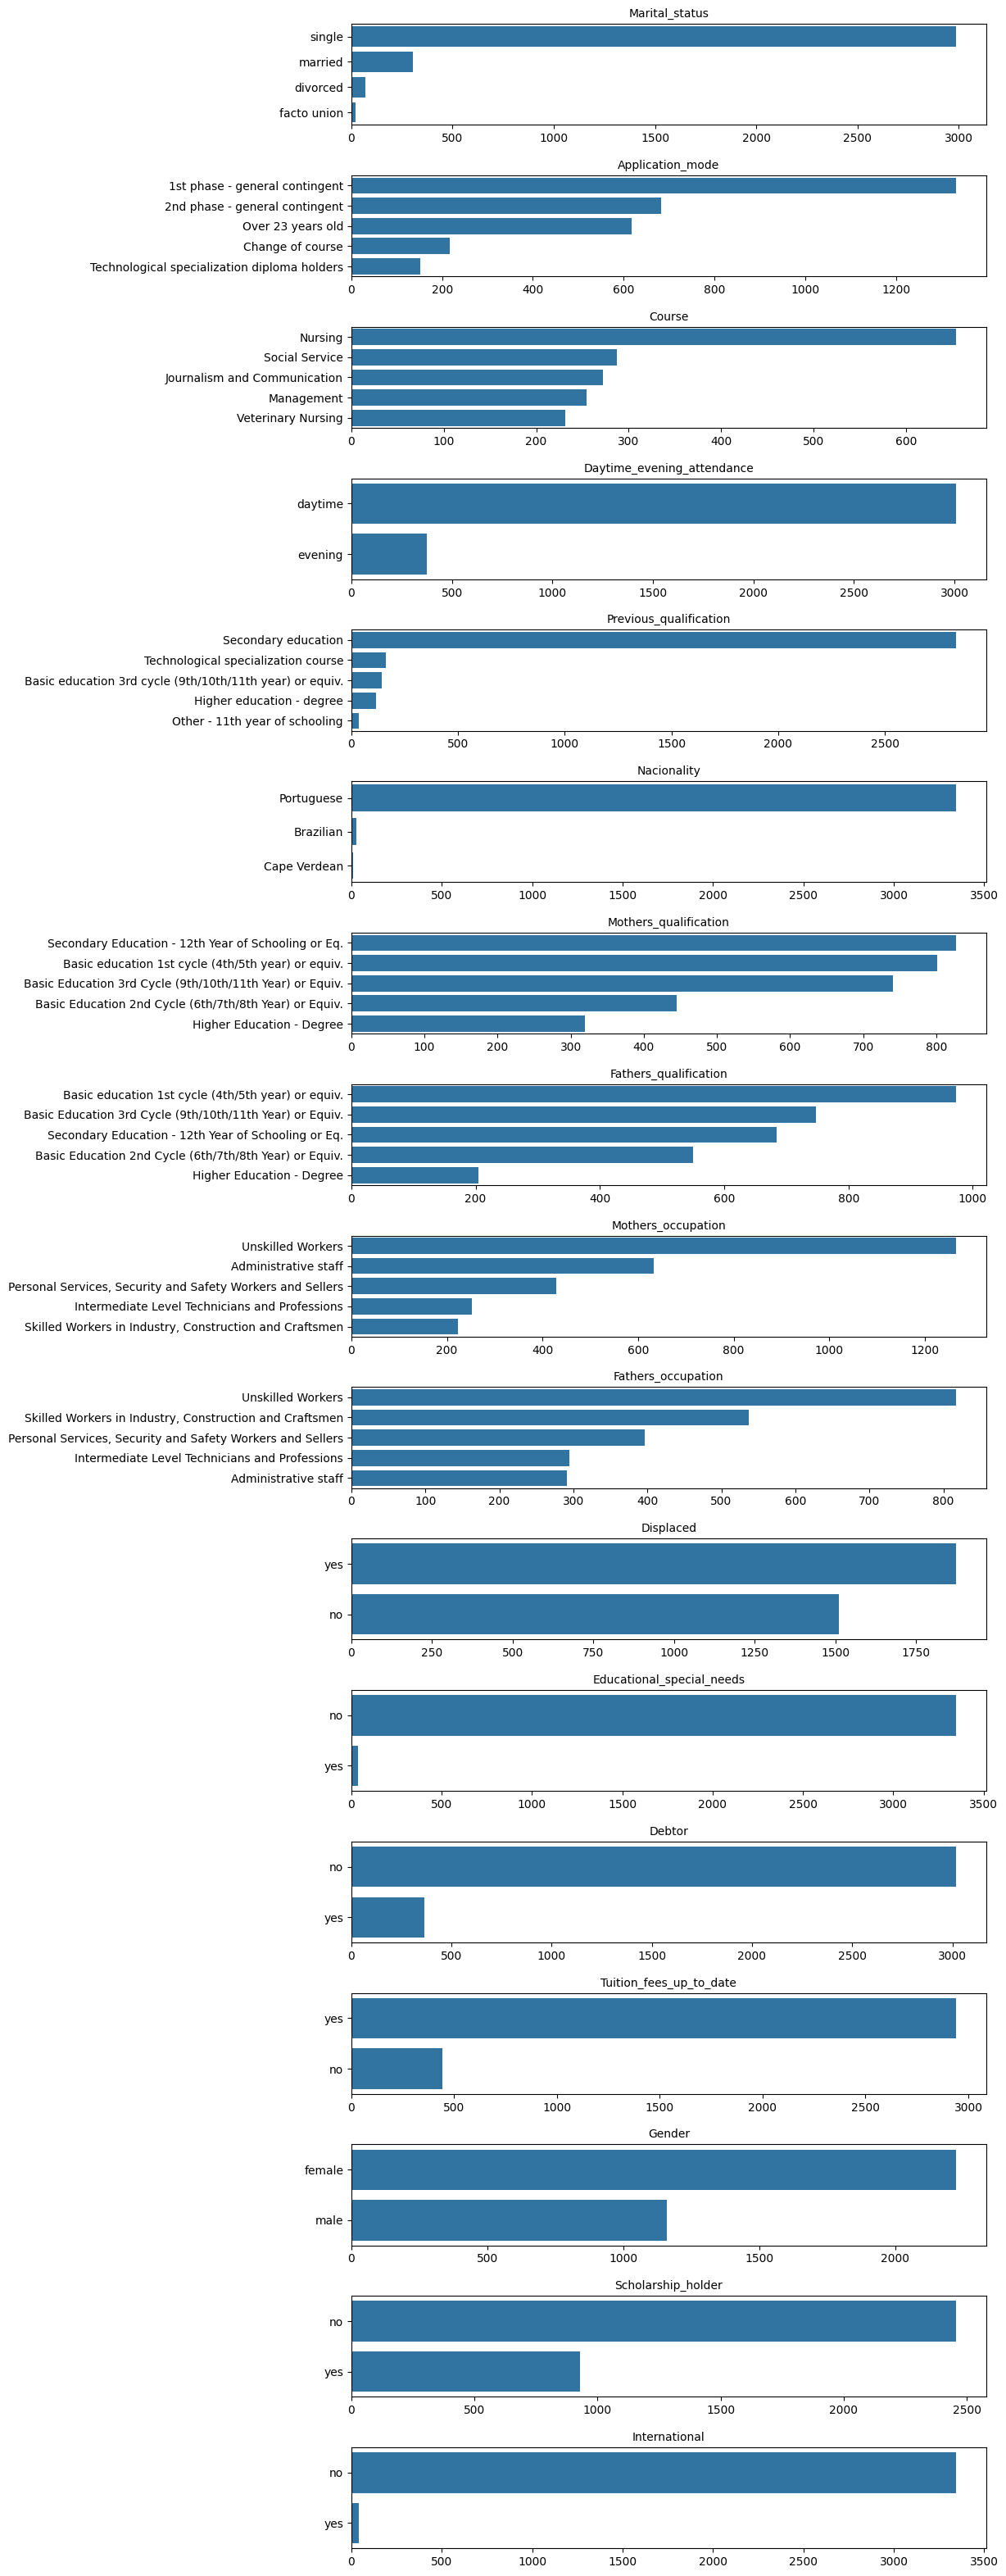

In [ ]:
# Value distribution
fig, ax = plt.subplots(len(quali_columns), 1,figsize=(10,40))
plt.subplots_adjust(hspace=0.5)
for i, feature in enumerate(quali_columns):
    top_5_values = list(df[feature].value_counts().head(5).index)
    temp_df = df[df[feature].isin(top_5_values)]
    sns.countplot(data=temp_df, y=feature, ax=ax[i], order=temp_df[feature].value_counts().index)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].set_title(feature, fontsize=10)
plt.show()

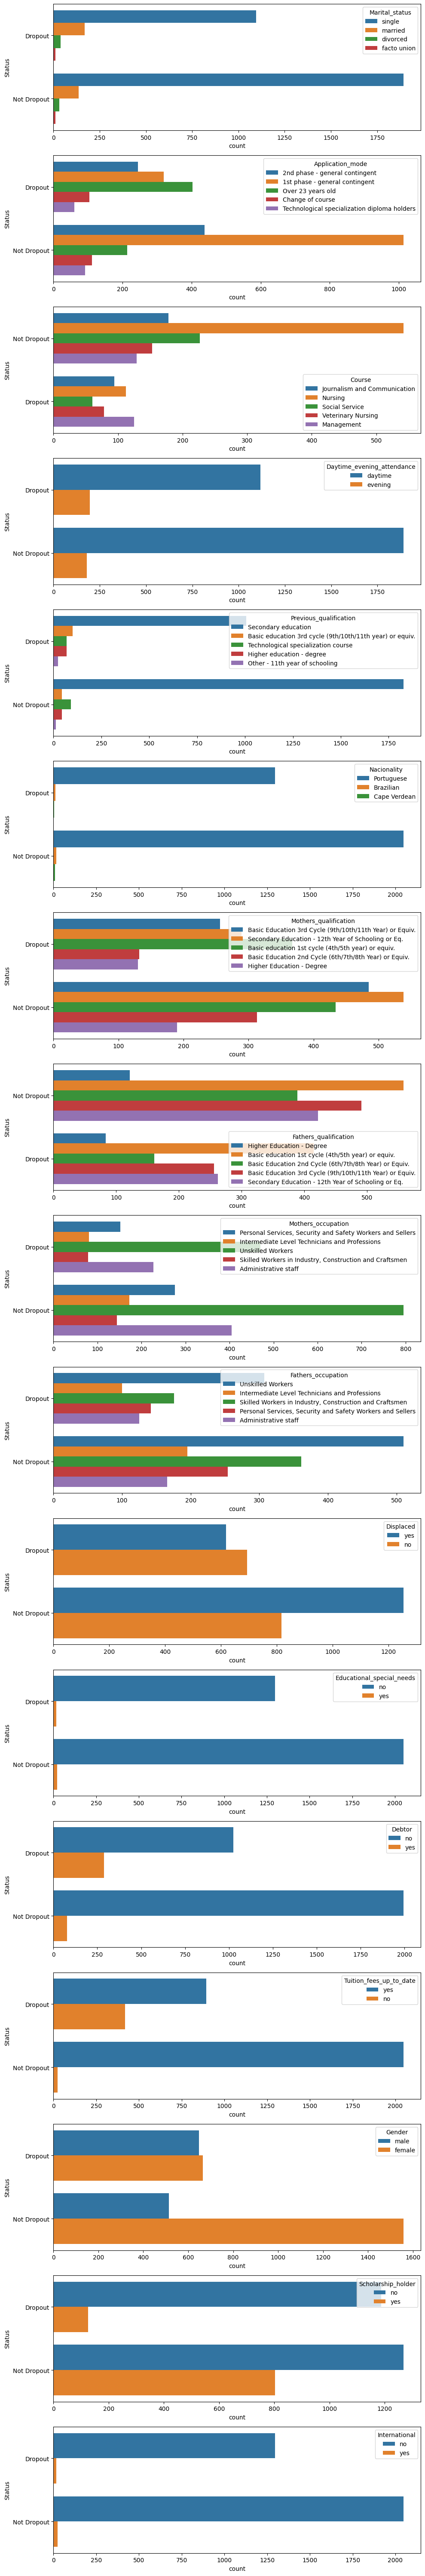

In [ ]:
# Value distribution to target
def qualitative_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(10,60))
    for i, feature in enumerate(features):

        top_5_values = list(df[feature].value_counts().head(5).index)
        temp_df = df[df[feature].isin(top_5_values)]

        if segment_feature:
            sns.countplot(data=temp_df, y=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=temp_df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

qualitative_plot(
    features=quali_columns,
    df=df,
    segment_feature=target
)

Interesting Facts
| Feature | Fact
| --- | ---
| Application_mode          | Over 23 years old, one third of them is dropout
| Course			        | Management, almost half of them is dropout
| Debtor			        | yes, around 80% of debtor is dropout
| Tuition_fees_up_to_date	| no, almost all of student with not updated tuition fee is dropout
| Gender			        | male, number of male student who got dropout is greater than the graduate
| Scholarship_holder	    | no, almost half of students who didn't receive scholarship are dropout

### Quantitative Features

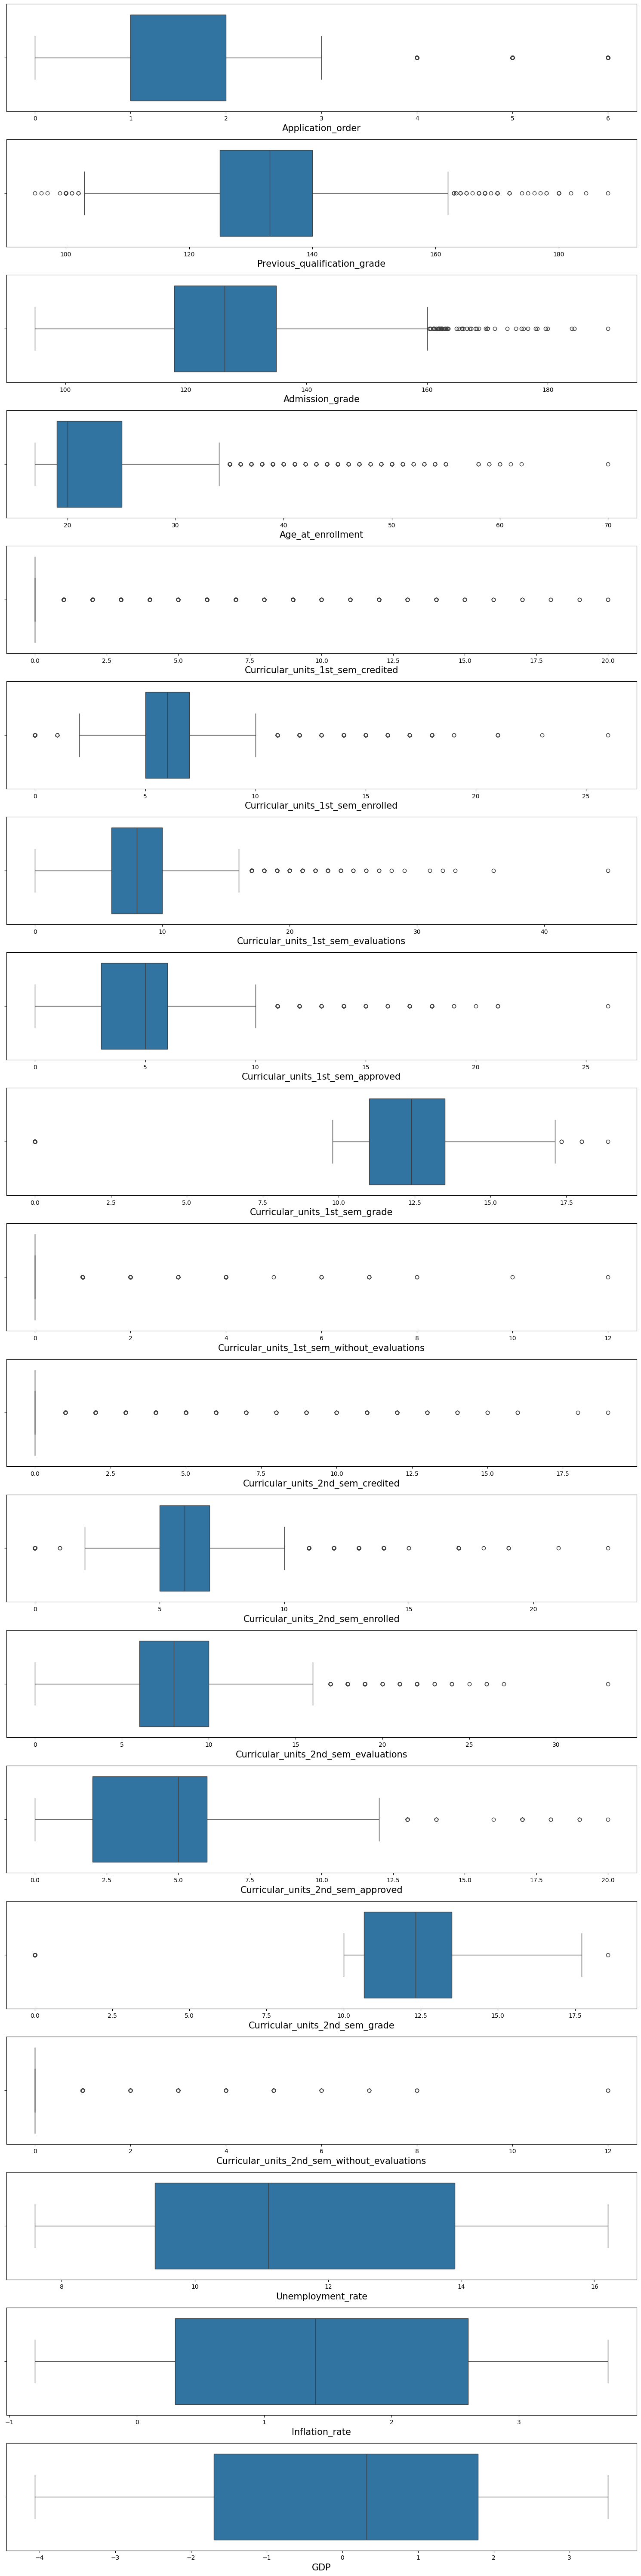

In [ ]:
def quantitative_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(15,60))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers, hue=segment_feature)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_xlabel(feature, fontsize=15)
    plt.tight_layout()
    plt.show()

quantitative_dis_plot(
    features=quanti_columns,
    df=df
)

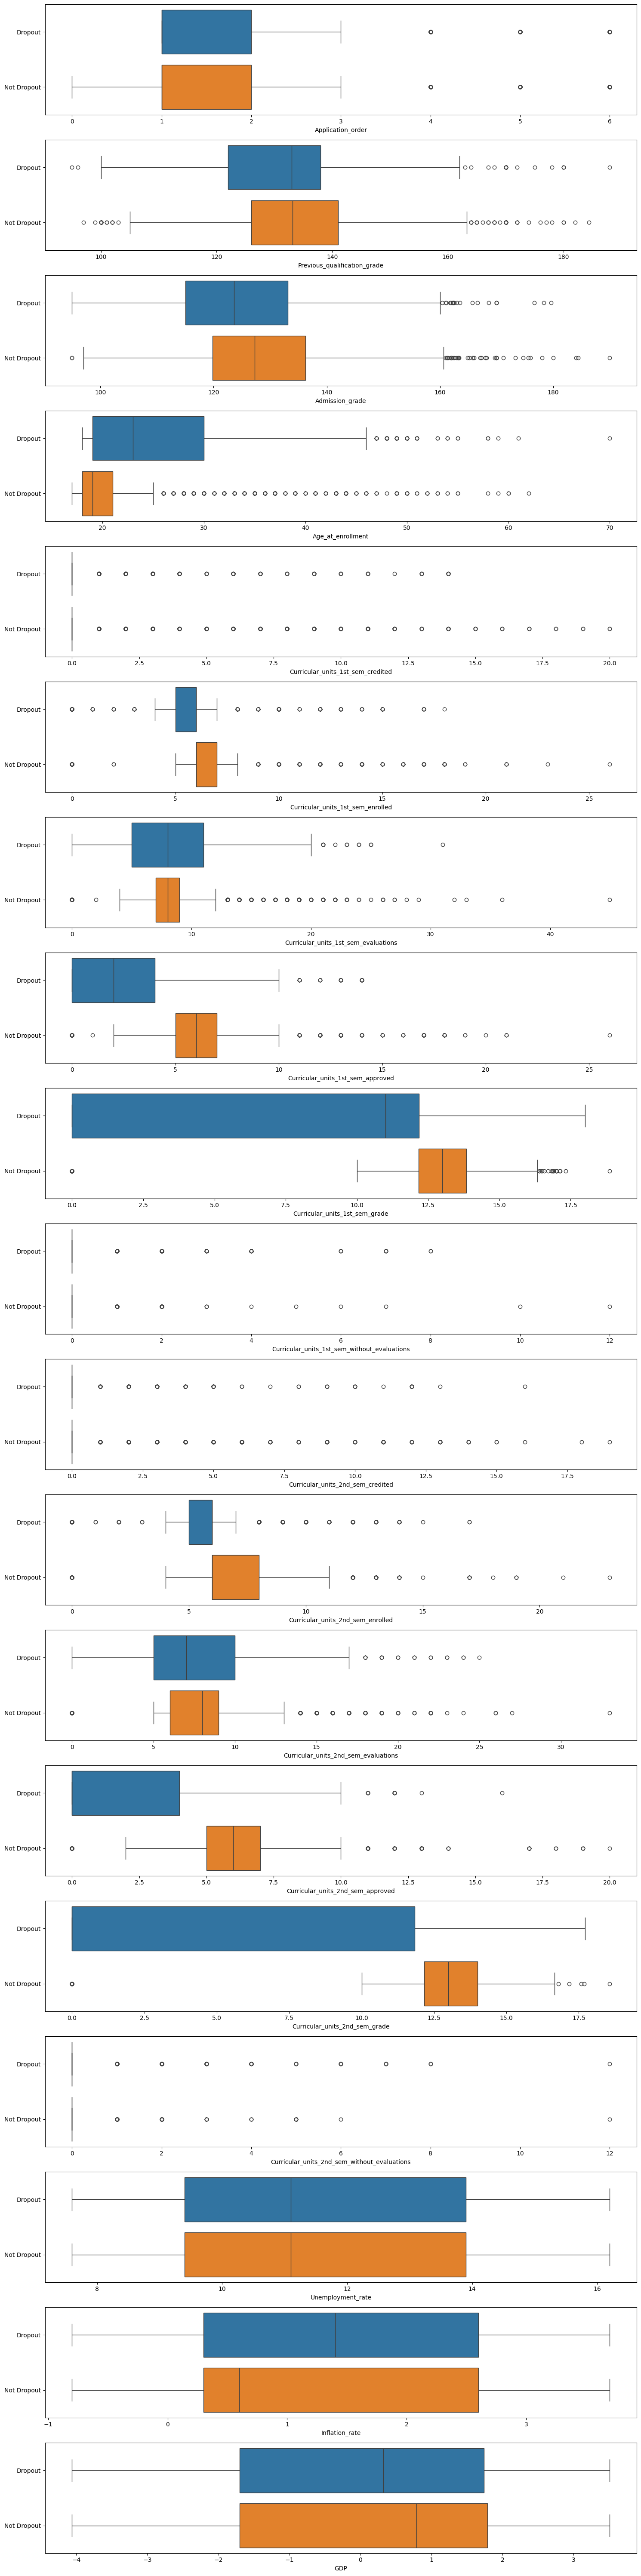

In [ ]:
quantitative_dis_plot(
    features=quanti_columns,
    df=df,
    segment_feature=target
)

Interesting Facts
| Feature | Fact
| --- | ---
| Admission_grade | Lower than 120 will likely be dropout
| Age_at_enrollment | Higher than 23 will likely be dropout
| All curricular features | the lower the number, the higher the chance to dropout

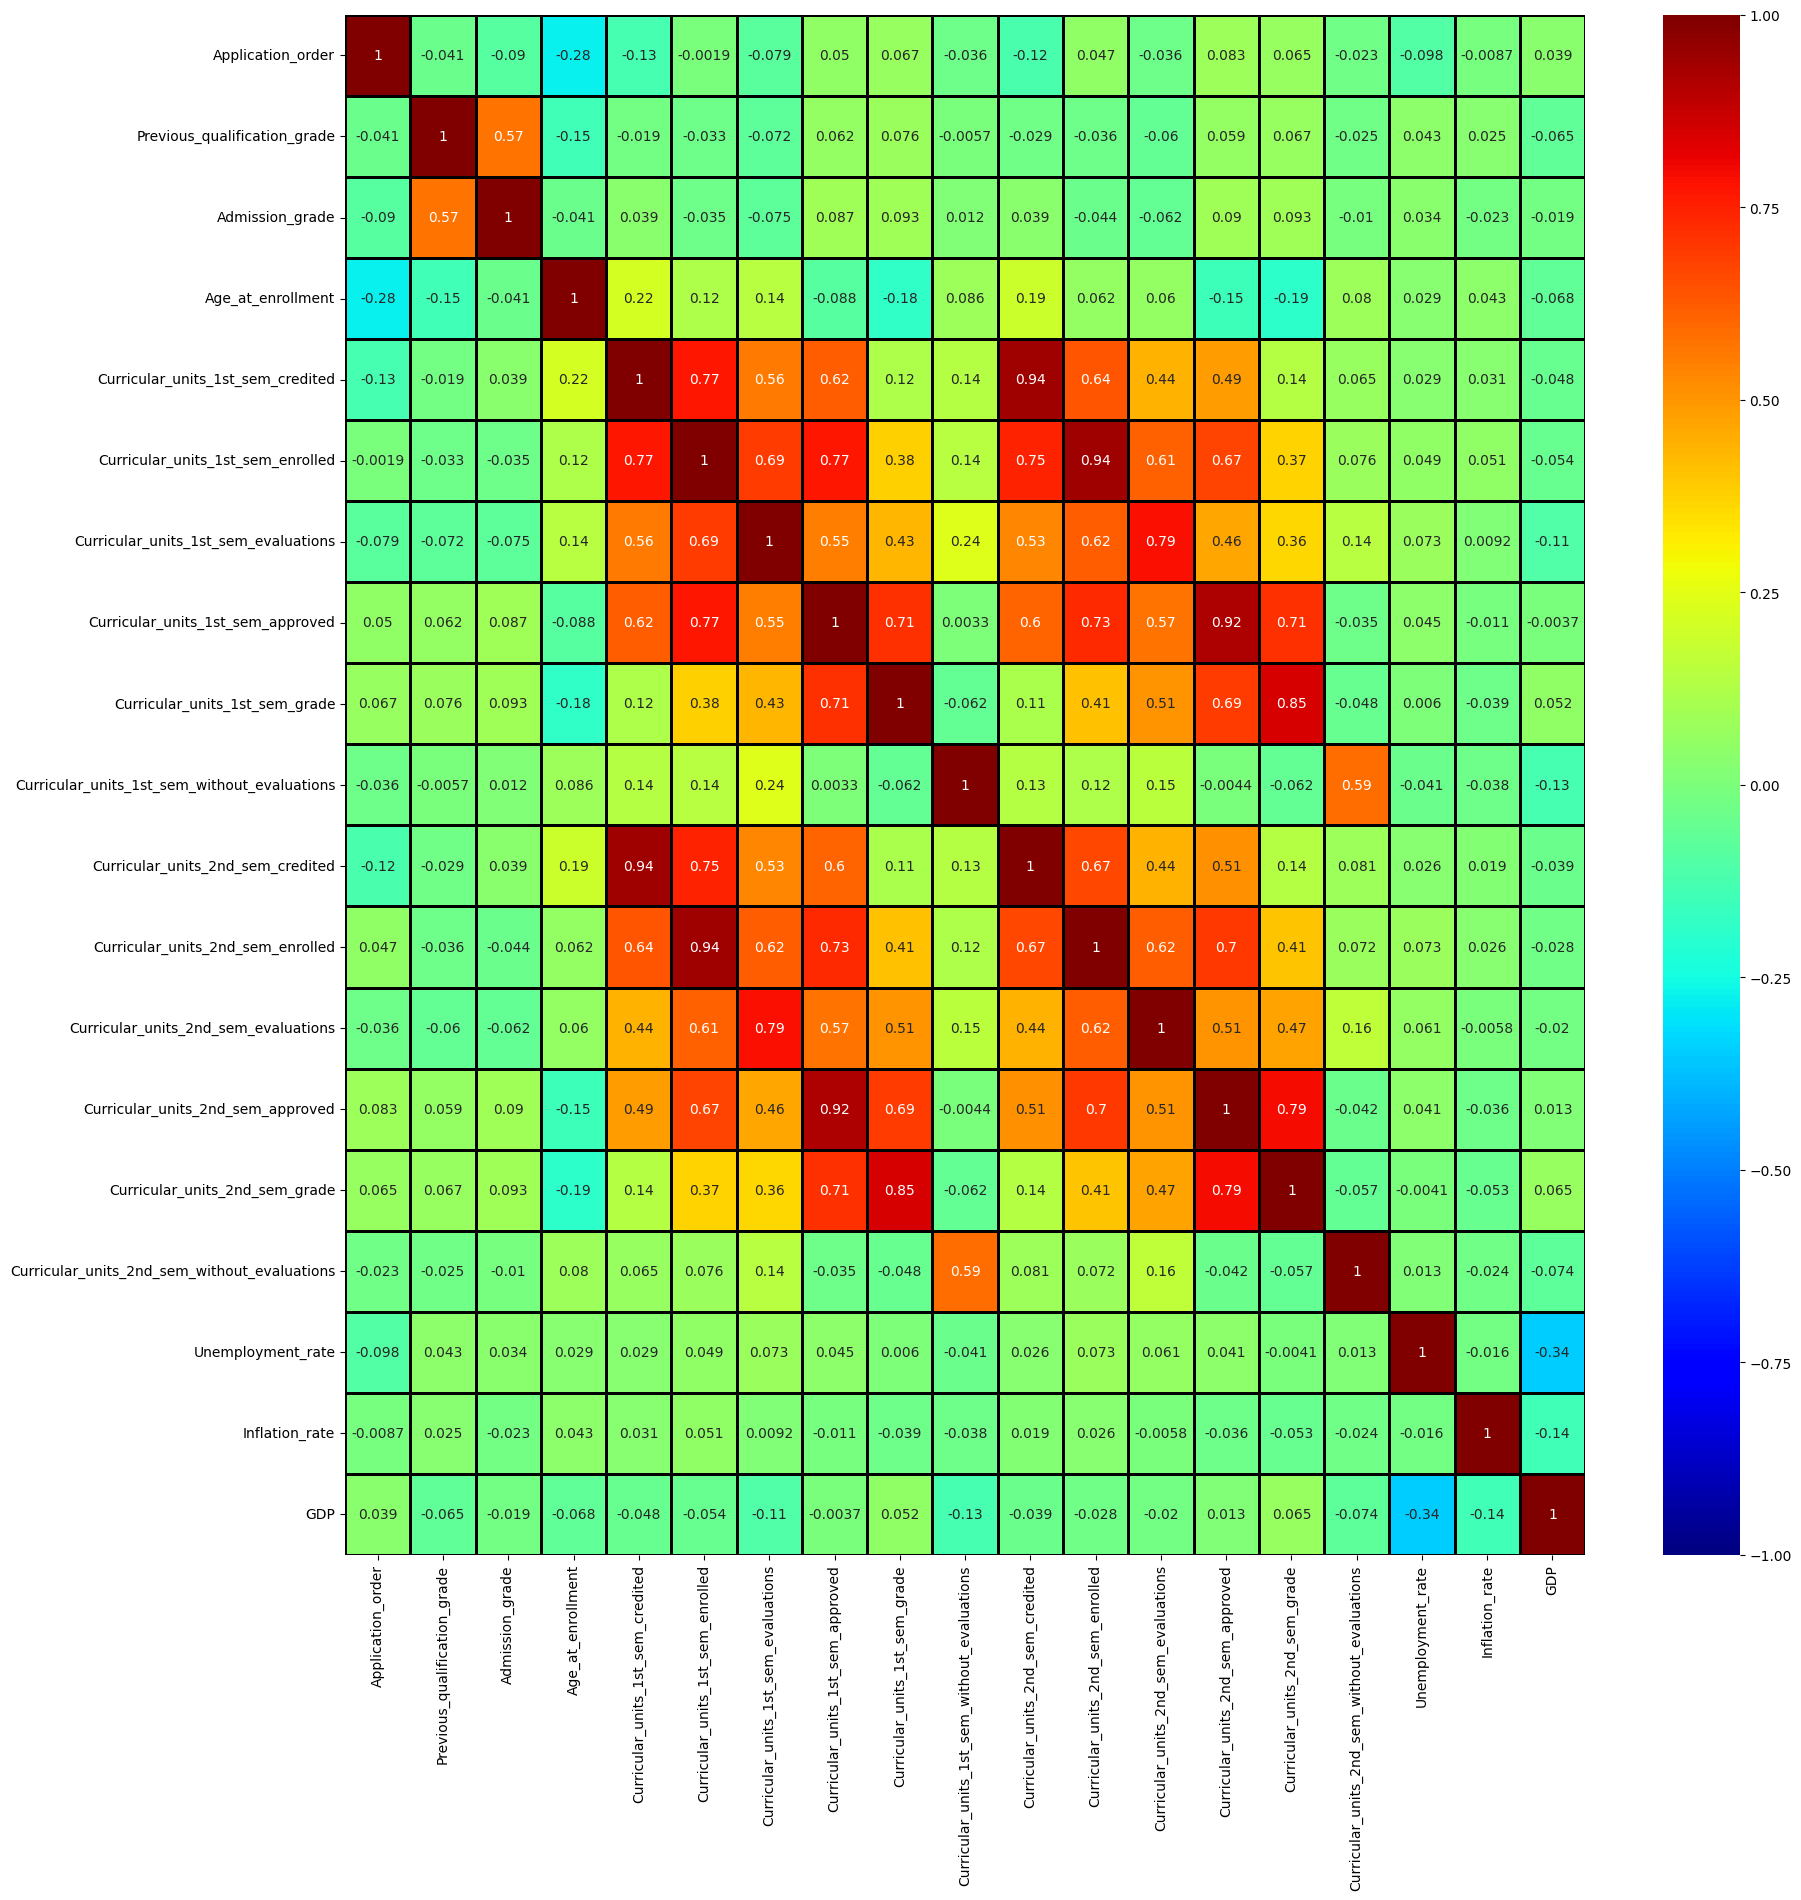

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df[quanti_columns].corr(), annot=True, cmap='jet', linecolor='black', linewidth=1,
            vmin=-1, vmax=1)
plt.show()

Interesting Fact
<br>All curriculum related features in semester 1 have a high correlation (0.5 - 1.0) with its pair in semester 2
<br>Example: Curricular_units_1st_sem_credited with Curricular_units_2nd_sem_credited

## Data Preprocessing

### Train-test splitting

In [ ]:
x = df.drop(target, axis=1)
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

x_train.shape, x_test.shape

((2707, 36), (677, 36))

### Encoding & scaling

In [42]:
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = RobustScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "scaler_{}.joblib".format(feature))

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = RobustScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "scaler_{}.joblib".format(feature))
        return df

def encoding(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "encoder_{}.joblib".format(feature))

            df_test["{}".format(feature)] = encoder.transform(df_test[feature])
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "encoder_{}.joblib".format(feature))
        return df

In [43]:
new_x_train, new_x_test = scaling(quanti_columns, x_train, x_test)
new_x_train, new_x_test = encoding(quali_columns, new_x_train, new_x_test)

In [44]:
encoding_target = {'Not Dropout':0, 'Dropout':1}
decoding_target = {0:'Not Dropout', 1:'Dropout'}

new_y_train = y_train.map(encoding_target).values
new_y_test = y_test.map(encoding_target).values

### PCA

In [45]:
x_train_pca = new_x_train.copy().reset_index(drop=True)
x_test_pca = new_x_test.copy().reset_index(drop=True)

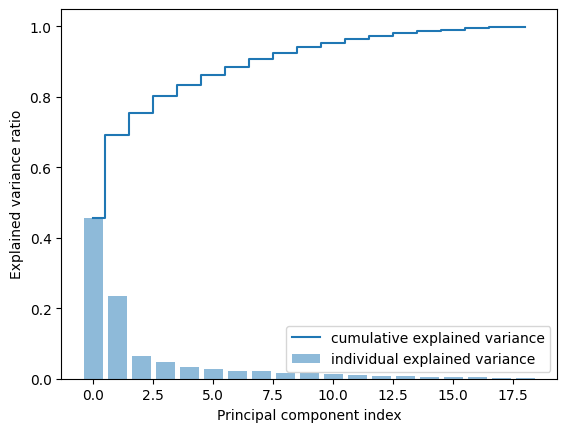

In [46]:
pca = PCA(n_components=len(quanti_columns), random_state=123)
princ_comp = pca.fit_transform(x_train_pca[quanti_columns])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(quanti_columns)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(quanti_columns)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [47]:
pca = PCA(n_components=5, random_state=123)
pca.fit(x_train_pca[quanti_columns])
joblib.dump(pca, "pca.joblib")
princ_comp = pca.transform(x_train_pca[quanti_columns])
x_train_pca[["pc_1", "pc_2", "pc_3", "pc_4", "pc_5"]] = pd.DataFrame(princ_comp, columns=["pc_1", "pc_2", "pc_3", "pc_4", "pc_5"])
x_train_pca.drop(columns=quanti_columns, axis=1, inplace=True)
x_train_pca.head()

,Marital_status,Application_mode,Course,Daytime_evening_attendance,Previous_qualification,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,International,pc_1,pc_2,pc_3,pc_4,pc_5
0,3,5,4,0,8,2,1,1,6,9,0,0,0,1,0,1,0,7.498549,-1.200533,0.170901,0.659142,-0.694904
1,3,9,10,0,8,2,1,1,4,9,0,0,1,0,0,0,0,0.124702,1.171376,-1.042682,-0.850935,0.274821
2,3,2,10,0,8,2,2,2,11,12,0,0,0,1,0,1,0,1.058035,2.695481,-0.754289,0.585708,0.747766
3,3,2,12,0,8,2,8,9,6,5,1,0,0,1,0,0,0,-0.184734,2.035791,1.194654,0.304376,-0.612178
4,3,11,12,0,9,2,1,1,3,4,1,0,0,1,0,1,0,2.579378,0.218916,-0.672897,2.235787,-0.701959


In [48]:
test_princ_comp = pca.transform(x_test_pca[quanti_columns])
x_test_pca[["pc_1", "pc_2", "pc_3", "pc_4", "pc_5"]] = pd.DataFrame(test_princ_comp, columns=["pc_1", "pc_2", "pc_3", "pc_4", "pc_5"])
x_test_pca.drop(columns=quanti_columns, axis=1, inplace=True)
x_test_pca.head()

,Marital_status,Application_mode,Course,Daytime_evening_attendance,Previous_qualification,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,International,pc_1,pc_2,pc_3,pc_4,pc_5
0,2,9,8,0,8,2,8,1,11,12,0,0,0,0,0,0,0,-4.429275,-4.798769,-0.220734,-0.188865,-0.673361
1,3,0,10,0,8,2,8,8,1,7,0,0,0,0,0,0,0,-2.746278,-4.410464,4.364916,-3.269667,5.944866
2,3,9,10,0,8,2,4,4,7,8,1,0,0,1,0,0,0,0.850449,1.922515,-0.823035,0.319553,0.611714
3,0,9,9,1,8,2,1,1,11,5,1,0,0,1,0,0,0,-0.860631,0.368627,-1.430569,-1.063982,-1.610253
4,3,0,8,0,8,2,8,1,7,3,1,0,0,1,1,0,0,-0.839670,1.927799,3.801671,-0.154204,-0.697341


In [49]:
x_train_pca.dtypes.values

array([dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64')], dtype=object)

## Modeling

### Algorithms

In [50]:
logreg = LogisticRegression(random_state=123)
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier(random_state=123)
# rforest = RandomForestClassifier(random_state=123)
# gboosting = GradientBoostingClassifier(random_state=123)
# hgboosting = HistGradientBoostingClassifier(random_state=123)

In [51]:
# model benchmarking
models = [logreg, knn, dtree]

# define an evaluation metrics
recall_mean = []
recall_std = []
recall_all = []
recall_name = []

# find the best model
for model in models:
    model_cv = cross_val_score(
        model,
        x_train_pca,
        new_y_train,
        cv=5,
        scoring='recall'
    )

    recall_name.append(model.__class__.__name__)
    recall_mean.append(model_cv.mean())
    recall_std.append(model_cv.std())
    recall_all.append(model_cv.round(4))

In [52]:
# train score
train_score = pd.DataFrame(
    {
        'model': recall_name,
        'train - recall mean': recall_mean,
        'train - recall std': recall_std,
        'train - recall all': recall_all
    }
).sort_values('train - recall mean', ascending=False)

train_score

,model,train - recall mean,train - recall std,train - recall all
2,DecisionTreeClassifier,0.781905,0.038966,"[0.8048, 0.7286, 0.8429, 0.7714, 0.7619]"
0,LogisticRegression,0.769524,0.031095,"[0.7476, 0.7238, 0.7952, 0.8095, 0.7714]"
1,KNeighborsClassifier,0.582857,0.030506,"[0.6286, 0.5762, 0.6048, 0.5619, 0.5429]"


In [53]:
# test score
models = [logreg, knn, dtree]

# evaluation
recall_scores = []
model_name = []

for model in models:
    # fitting
    model.fit(x_train_pca, new_y_train)

    # model predict
    y_pred_test = model.predict(x_test_pca)

    # evaluate
    model_name.append(model.__class__.__name__)
    recall = recall_score(y_pred_test, new_y_test)
    recall_scores.append(recall)

In [54]:
test_score = pd.DataFrame(
    {
        'model': model_name,
        'test - recall': recall_scores
    }
).sort_values('test - recall', ascending=False)

test_score

,model,test - recall
0,LogisticRegression,0.871369
1,KNeighborsClassifier,0.757282
2,DecisionTreeClassifier,0.746479


In [55]:
train_test_score = train_score.merge(test_score)
train_test_score

,model,train - recall mean,train - recall std,train - recall all,test - recall
0,DecisionTreeClassifier,0.781905,0.038966,"[0.8048, 0.7286, 0.8429, 0.7714, 0.7619]",0.746479
1,LogisticRegression,0.769524,0.031095,"[0.7476, 0.7238, 0.7952, 0.8095, 0.7714]",0.871369
2,KNeighborsClassifier,0.582857,0.030506,"[0.6286, 0.5762, 0.6048, 0.5619, 0.5429]",0.757282


In [56]:
train_test_score['difference'] = train_test_score['train - recall mean'] - train_test_score['test - recall']
train_test_score.sort_values('difference', ascending=True)

,model,train - recall mean,train - recall std,train - recall all,test - recall,difference
2,KNeighborsClassifier,0.582857,0.030506,"[0.6286, 0.5762, 0.6048, 0.5619, 0.5429]",0.757282,-0.174424
1,LogisticRegression,0.769524,0.031095,"[0.7476, 0.7238, 0.7952, 0.8095, 0.7714]",0.871369,-0.101845
0,DecisionTreeClassifier,0.781905,0.038966,"[0.8048, 0.7286, 0.8429, 0.7714, 0.7619]",0.746479,0.035426


Here we choose Logistic Regression as the best model with high recall on test-set

### Hyperparameter tuning

In [57]:
param_grid = {
    'penalty': ['l1', 'l2'],               # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100],    # Regularization parameter
    'solver': ['liblinear', 'saga'],       # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300, 400]        # Maximum number of iterations for the solvers
}

In [58]:
# tuned_model = GridSearchCV(
#     estimator=logreg,
#     param_grid=param_grid,
#     cv=5,
#     scoring='recall',
#     n_jobs=1
# )

# tuned_model.fit(x_train_pca, new_y_train)

In [59]:
# tuned_model.best_estimator_

In [60]:
logreg = LogisticRegression(C=1, penalty='l1', solver='saga', random_state=123)
logreg.fit(x_train_pca, new_y_train)
joblib.dump(logreg, 'tuned_logreg_model.joblib')

['tuned_logreg_model.joblib']

## Evaluation

### Train set

In [61]:
y_train_pred = logreg.predict(x_train_pca)
y_train_pred = pd.Series(y_train_pred).map(decoding_target)
print(classification_report(y_true=y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

     Dropout       0.88      0.77      0.82      1050
 Not Dropout       0.87      0.94      0.90      1657

    accuracy                           0.87      2707
   macro avg       0.87      0.85      0.86      2707
weighted avg       0.87      0.87      0.87      2707



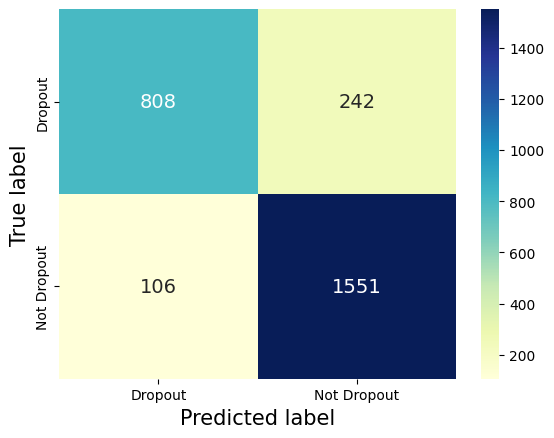

In [62]:
labels = ['Dropout', 'Not Dropout']
cnf_matrix = confusion_matrix(y_train, y_train_pred, labels=labels)
cnf_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
sns.heatmap(cnf_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
plt.ylabel('True label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)
plt.show()

### Test set

In [63]:
y_test_pred = logreg.predict(x_test_pca)
y_test_pred = pd.Series(y_test_pred).map(decoding_target)
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

     Dropout       0.88      0.80      0.84       263
 Not Dropout       0.88      0.93      0.90       414

    accuracy                           0.88       677
   macro avg       0.88      0.86      0.87       677
weighted avg       0.88      0.88      0.88       677



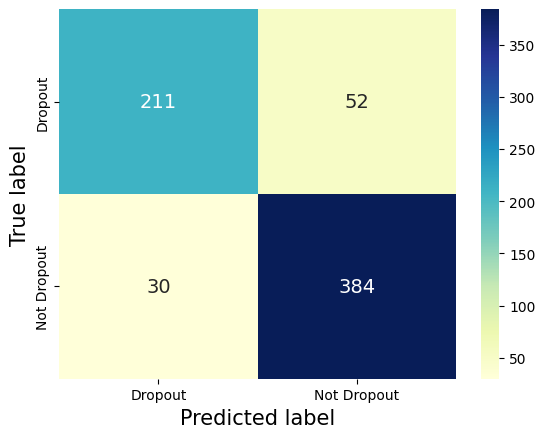

In [64]:
labels = ['Dropout', 'Not Dropout']
cnf_matrix = confusion_matrix(y_test, y_test_pred, labels=labels)
cnf_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
sns.heatmap(cnf_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
plt.ylabel('True label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)
plt.show()